In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [331]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Загружаю датасет**

In [332]:
df = pd.read_csv('bbc-news-data.csv',sep='\t') 
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


**Удаляю колонку "filename" за ненадобностью**

In [333]:
df = df.drop(columns=['filename'], axis=1)
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


**ЛЕММИТИЗИРУЮ ДАННЫЕ**

Лемматизация – это процесс преобразования слова в его базовую форму. Разница между стемминг (stemming) и лемматизацией заключается в том, что лемматизация учитывает контекст и преобразует слово в его значимую базовую форму, тогда как стемминг просто удаляет последние несколько символов, что часто приводит к неверному значению и орфографическим ошибкам.

Например, лемматизация правильно определила бы базовую форму «caring» и «care», в то время как стемминг отрезал бы «ing» и преобразовал ее в car.

In [334]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
    
df['title'] = get_lemmatized_text(df['title'])
df['content'] = get_lemmatized_text(df['content'])
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BA's profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


**Избавляюсь от лишних знаков и цифр**

In [335]:
df['title'] = df['title'].str.replace('''["\((.*)\)']''','',regex = True)
df['content'] = df['content'].str.replace('''["\((.*)\)']''','',regex = True)
df['title'] = df['title'].str.replace('[0-9]','', regex=True)
df['content'] = df['content'].str.replace('[0-9]','', regex=True)
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BAs profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


**Привожу текст к нижнему регистру**

In [336]:
df['title'] = df['title'].apply(lambda x: x.lower())
df['content'] = df['content'].apply(lambda x: x.lower())
df

,category,title,content
0,business,ad sale boost time warner profit,quarterly profit at us medium giant timewarner...
1,business,dollar gain on greenspan speech,the dollar ha hit it highest level against the...
2,business,yukos unit buyer face loan claim,the owner of embattled russian oil giant yukos...
3,business,high fuel price hit bas profit,british airways ha blamed high fuel price for ...
4,business,pernod takeover talk lift domecq,shares in uk drink and food firm allied domecq...
...,...,...,...
2220,tech,bt program to beat dialler scam,bt is introducing two initiative to help beat ...
2221,tech,spam e-mail tempt net shopper,computer user across the world continue to ign...
2222,tech,be careful how you code,a new european directive could put software wr...
2223,tech,us cyber security chief resigns,the man making sure us computer network are sa...


**Удаляю стоп-слова**

In [337]:
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
df

,category,title,content
0,business,ad sale boost time warner profit,quarterly profit us medium giant timewarner ju...
1,business,dollar gain greenspan speech,dollar ha hit highest level euro almost three ...
2,business,yukos unit buyer face loan claim,owner embattled russian oil giant yukos ask bu...
3,business,high fuel price hit bas profit,british airways ha blamed high fuel price % dr...
4,business,pernod takeover talk lift domecq,shares uk drink food firm allied domecq risen ...
...,...,...,...
2220,tech,bt program beat dialler scam,bt introducing two initiative help beat rogue ...
2221,tech,spam e-mail tempt net shopper,computer user across world continue ignore sec...
2222,tech,careful code,new european directive could put software writ...
2223,tech,us cyber security chief resigns,man making sure us computer network safe secur...


**ВЕКТОРИЗАЦИЯ ДАННЫХ**

**Использую функцию CountVectorizer**

*CountVectorizer* - предоставляет простой способ как токенизировать коллекцию текстовых документов и создать словарь известных слов, так и кодировать новые документы, используя этот словарь.

*Токенизация* - это процесс представления необработанного текста в более мелких единицах, называемых токенами. Затем эти маркеры могут быть сопоставлены с числами для дальнейшего использования в модели НЛП.

In [338]:
model = CountVectorizer(stop_words="english")
t = model.fit_transform(list(df['title']))
c = model.fit_transform(list(df['content']))

**toarray** - небольшой пакет Python для преобразования итерируемых объектов в массивы.

In [339]:
#df.title = t.toarray()
#df.content = c.toarray()

**Узнаю иникальные значения столбца 'category' и кодирую с помощью LabelEncoder**

In [340]:
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [341]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['category'] = LE.fit_transform(df['category'])
df

,category,title,content
0,0,ad sale boost time warner profit,quarterly profit us medium giant timewarner ju...
1,0,dollar gain greenspan speech,dollar ha hit highest level euro almost three ...
2,0,yukos unit buyer face loan claim,owner embattled russian oil giant yukos ask bu...
3,0,high fuel price hit bas profit,british airways ha blamed high fuel price % dr...
4,0,pernod takeover talk lift domecq,shares uk drink food firm allied domecq risen ...
...,...,...,...
2220,4,bt program beat dialler scam,bt introducing two initiative help beat rogue ...
2221,4,spam e-mail tempt net shopper,computer user across world continue ignore sec...
2222,4,careful code,new european directive could put software writ...
2223,4,us cyber security chief resigns,man making sure us computer network safe secur...




---



**Использую логистическую регрессию и опледеляю точность**

In [342]:
vec = CountVectorizer()  
x = vec.fit_transform(df.content.values.astype('U'))
y = df['category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 42)

In [343]:
lr = LogisticRegression().fit(x_train, y_train)
x_pred = lr.predict(x_test) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [344]:
from sklearn.metrics import accuracy_score
accuracy_score(x_pred, y_test)

0.9679075738125802

**LogisticRegression = 0.97**



---



**Использую градиендный бустинг и определяю точность**

In [345]:
vec = CountVectorizer()  
x = vec.fit_transform(df.content.values.astype('U'))
y = df['category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 42)

In [346]:
gr = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = gr.predict(x_test)

In [347]:
accuracy_score(y_test, y_pred)

0.9653401797175867

**GradientBoostingClassifier = 0.96**



---




**GRID SEARCH**

Подбираем параметры для модели машинного обучения

In [348]:
clf = RandomForestClassifier()

In [349]:
parametrs = { 'n_estimators': range (65, 127, 182),
              'max_depth': range (1, 13, 8),
              'min_samples_leaf': range (4, 8, 6),
              'min_samples_split': range (5, 8, 2) } 

In [350]:
grid = GridSearchCV(clf, param_grid = parametrs, cv = 10, scoring='accuracy')
model_grid = grid.fit(x_train,y_train)

**Выводим лучшие параметры и точность**

In [351]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 65}
Best score is: 0.9149329501915708




---



**СТРОИМ ДЛЯ КАЖДОГО ГИПЕРПАРАМЕТРА КРИВЫЕ ВАЛИДАЦИИ**

Строю кривую валидацию для гиперпараметра "max_depth"

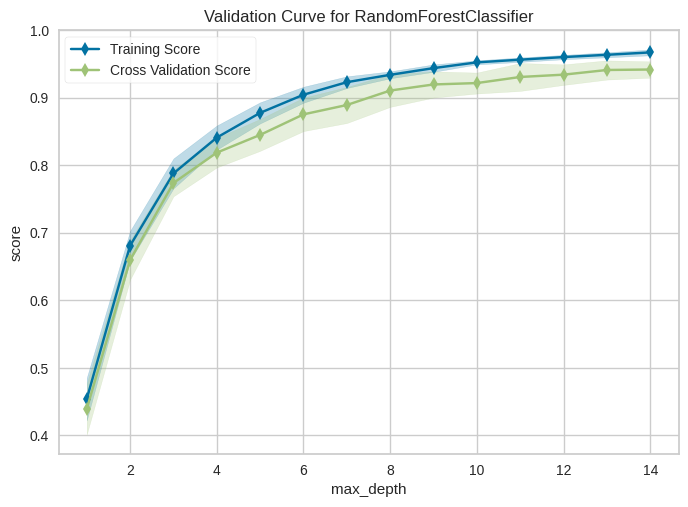

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_depth=9,
                                                 min_samples_leaf=4,
                                                 min_samples_split=5,
                                                 n_estimators=65,
                                                 random_state=42),
                param_name='max_depth',
                param_range=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [352]:
from yellowbrick.model_selection import validation_curve 
clf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 4, 
                             min_samples_split = 5, n_estimators = 65,
                             random_state=42)

print(validation_curve(clf, x_train, y_train, param_name = "max_depth",
      param_range = np.arange(0, 15), cv = 10, scoring = "accuracy"))

Строю кривую валидацию для гиперпараметра "min_samples_leaf"

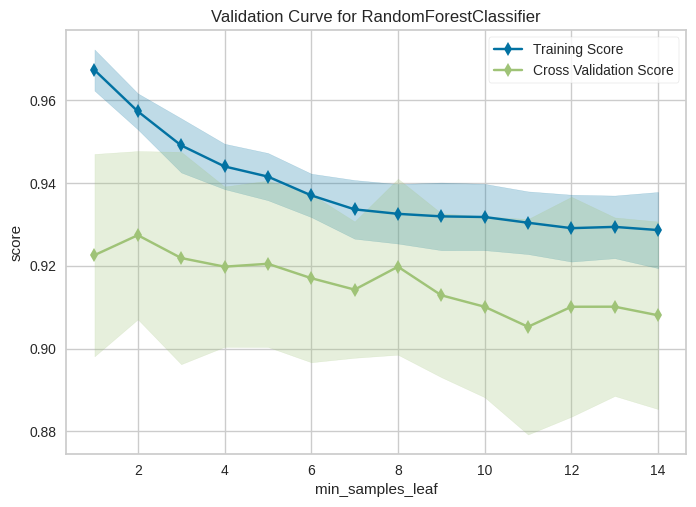

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_depth=9,
                                                 min_samples_leaf=4,
                                                 min_samples_split=5,
                                                 n_estimators=65,
                                                 random_state=42),
                param_name='min_samples_leaf',
                param_range=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [353]:
from yellowbrick.model_selection import validation_curve 
clf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 4, 
                             min_samples_split = 5, n_estimators = 65, 
                             random_state=42)

print(validation_curve(clf, x_train, y_train, param_name = "min_samples_leaf",
      param_range = np.arange(0, 15), cv = 10, scoring = "accuracy"))

Строю кривую валидацию для гиперпараметра "min_samples_split"

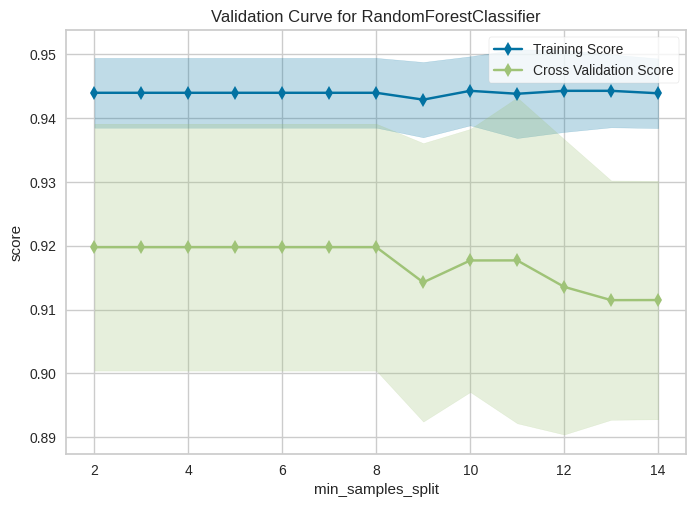

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_depth=9,
                                                 min_samples_leaf=4,
                                                 min_samples_split=5,
                                                 n_estimators=65,
                                                 random_state=42),
                param_name='min_samples_split',
                param_range=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [354]:
from yellowbrick.model_selection import validation_curve 
clf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 4, 
                             min_samples_split = 5, n_estimators = 65,
                             random_state=42)

print(validation_curve(clf, x_train, y_train, param_name = "min_samples_split",
      param_range = np.arange(0, 15), cv = 10, scoring = "accuracy"))

Строю кривую валидацию для гиперпараметра "n_estimators"

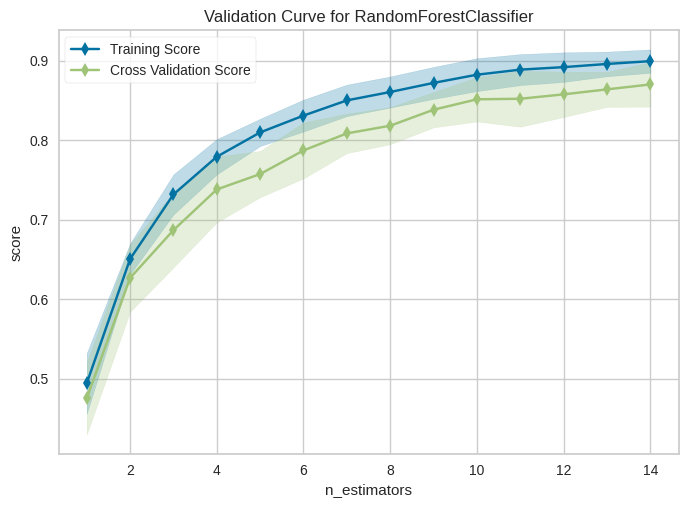

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_depth=9,
                                                 min_samples_leaf=4,
                                                 min_samples_split=5,
                                                 n_estimators=65,
                                                 random_state=42),
                param_name='n_estimators',
                param_range=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [357]:
from yellowbrick.model_selection import validation_curve 
clf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 4, 
                             min_samples_split = 5, n_estimators = 65,
                             random_state=42)

print(validation_curve(clf, x_train, y_train, param_name = "n_estimators",
      param_range = np.arange(0, 15), cv = 10, scoring = "accuracy"))